# Processing

In [1]:
import pandas as pd
import numpy as np

rppa_sheets = pd.read_excel('/workspaces/HOCMO/MDD_RPPA_Level3_preprocessed_2020-9.xlsx', sheet_name=None)
rppa_sheet = rppa_sheets['MDD_RPPA_Level3_annotated'].set_index('Protein')
rppa_sheet.columns = [c.split('_')[0]+'_'+c.split('_')[1] for c in rppa_sheet.columns]
rppa_sheet = rppa_sheet.apply(pd.to_numeric, errors='ignore')

rppa_averaged = rppa_sheet.groupby(rppa_sheet.columns, axis=1, sort=False).mean()
rppa_averaged = rppa_averaged[rppa_averaged.columns[~rppa_averaged.columns.str.endswith('_1')]]
rppa_sheet = rppa_sheet.apply(pd.to_numeric, errors='ignore')

rppa_averaged = rppa_sheet.groupby(rppa_sheet.columns, axis=1, sort=False).mean()
rppa_averaged = rppa_averaged[rppa_averaged.columns[~rppa_averaged.columns.str.endswith('_1')]]

rppa_averaged= rppa_averaged[['Ctrl_4', 'Ctrl_8', 'Ctrl_24', 'Ctrl_48', 
               'EGF_4', 'EGF_8', 'EGF_24', 'EGF_48',
               'HGF_4', 'HGF_8', 'HGF_24', 'HGF_48', 
               'OSM_4', 'OSM_8','OSM_24', 'OSM_48', 
               'BMP2_4','BMP2_8', 'BMP2_24', 'BMP2_48', 
               'IFNG_4', 'IFNG_8', 'IFNG_24','IFNG_48', 
               'TGFB_4', 'TGFB_8', 'TGFB_24', 'TGFB_48'
               ]]

time_conditions=['_4','_8','_24','_48']

for time_condition in time_conditions:
    time_m=rppa_averaged.columns.str.endswith(time_condition)
    conditions=rppa_averaged.columns[time_m&(~rppa_averaged.columns.str.contains('Ctrl'))].unique()
    print (conditions)
    for condition in conditions:
        rppa_averaged[condition] = rppa_averaged[condition]-rppa_averaged['Ctrl'+time_condition]
    rppa_averaged=rppa_averaged.drop('Ctrl'+time_condition,axis=1)
rppa_averaged = np.absolute(rppa_averaged)

Index(['EGF_4', 'HGF_4', 'OSM_4', 'BMP2_4', 'IFNG_4', 'TGFB_4'], dtype='object')
Index(['EGF_8', 'HGF_8', 'OSM_8', 'BMP2_8', 'IFNG_8', 'TGFB_8'], dtype='object')
Index(['EGF_24', 'HGF_24', 'OSM_24', 'BMP2_24', 'IFNG_24', 'TGFB_24'], dtype='object')
Index(['EGF_48', 'HGF_48', 'OSM_48', 'BMP2_48', 'IFNG_48', 'TGFB_48'], dtype='object')


In [2]:
rppa_averaged

,EGF_4,EGF_8,EGF_24,EGF_48,HGF_4,HGF_8,HGF_24,HGF_48,OSM_4,OSM_8,...,BMP2_24,BMP2_48,IFNG_4,IFNG_8,IFNG_24,IFNG_48,TGFB_4,TGFB_8,TGFB_24,TGFB_48
Protein,,,,,,,,,,,,,,,,,,,,,
ABL1,0.049157,0.079951,0.030052,0.042217,0.071919,0.038183,0.083117,0.026330,0.050032,0.027077,...,0.023789,0.071314,0.033988,0.052358,0.047361,0.037396,0.050547,0.033159,0.031050,0.045654
ACACApS79,0.152832,0.136200,0.037562,0.193938,0.199244,0.157221,0.046797,0.233127,0.482309,0.074117,...,0.021280,0.128604,0.062324,0.171148,0.380278,0.713289,0.080166,0.024917,0.236249,0.122431
ACACA,0.300844,0.346848,0.111401,0.465326,0.378279,0.400327,0.393230,0.432240,0.541781,0.357302,...,0.687672,0.596771,0.812284,0.801005,0.589558,0.562646,0.855471,0.812629,0.423138,0.740998
ACTB,0.031806,0.089931,0.228721,0.414635,0.012234,0.073282,0.181127,0.431888,0.093043,0.209789,...,0.432777,0.670866,0.125165,0.281339,0.462946,0.185483,0.153416,0.406118,0.894917,1.027210
ADAR,0.062241,0.004090,0.198566,0.651324,0.015708,0.071103,0.163910,0.681838,0.054589,0.068093,...,0.138112,0.739005,0.020035,0.014355,0.105648,0.686257,0.055798,0.060584,0.176686,0.897050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAP1,0.204034,0.320344,0.894787,2.033225,0.208621,0.287992,0.806132,1.492314,0.242032,0.228851,...,0.872471,1.793938,0.259903,0.318673,0.924933,1.767933,0.221857,0.332257,0.857116,1.814121
YBX1pS102,0.780322,0.750876,1.167023,1.002398,0.317199,0.331333,0.597449,0.330785,0.574641,0.440617,...,1.041454,0.844355,1.020553,0.947352,1.360673,0.496940,0.863387,0.834913,1.193822,0.948001
YWHAB,0.095544,0.093693,0.162509,0.367276,0.102718,0.066244,0.134575,0.250118,0.140724,0.146803,...,0.152521,0.290974,0.109429,0.077350,0.238006,0.185260,0.110779,0.103499,0.099762,0.180218


In [3]:
rppa_averaged.to_csv("RPPA_test.csv")

# Function calls for HOCMO

In [4]:
from HOCMO import hocmo
import importlib

In [5]:
importlib.reload(hocmo)

<module 'HOCMO.hocmo' from '/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py'>

In [6]:
incidence_matrix,incidence_matrix_binary,protein_names,ligand_names,condition_names,tensor = hocmo.createTensor('/workspaces/HOCMO/RPPA_test.csv','Protein',6,4)

Size of the tensor: (4, 295, 6)


tensor size: (295, 6, 4)


/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:104: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, z, cmap='cm.coolwarm')


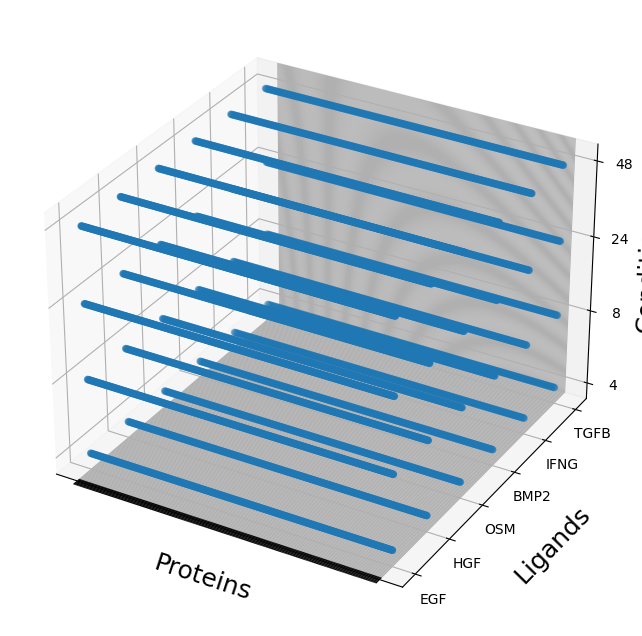

array([[[4.91570923e-02, 7.99505850e-02, 3.00517041e-02, 4.22171469e-02],
        [7.19191956e-02, 3.81825042e-02, 8.31171812e-02, 2.63296551e-02],
        [5.00317874e-02, 2.70766868e-02, 2.08809431e-02, 1.02543749e-02],
        [9.41918197e-03, 1.02967624e-02, 2.37886954e-02, 7.13144720e-02],
        [3.39884739e-02, 5.23575885e-02, 4.73611012e-02, 3.73957479e-02],
        [5.05468152e-02, 3.31594217e-02, 3.10496005e-02, 4.56539924e-02]],

       [[1.52831523e-01, 1.36200284e-01, 3.75617637e-02, 1.93938221e-01],
        [1.99243831e-01, 1.57220910e-01, 4.67968220e-02, 2.33127061e-01],
        [4.82309301e-01, 7.41165557e-02, 7.74255374e-03, 1.64120440e-01],
        [7.72893167e-02, 5.58689929e-02, 2.12800889e-02, 1.28603599e-01],
        [6.23237682e-02, 1.71147616e-01, 3.80277581e-01, 7.13289130e-01],
        [8.01659962e-02, 2.49174704e-02, 2.36249301e-01, 1.22430812e-01]],

       [[3.00844013e-01, 3.46847975e-01, 1.11401233e-01, 4.65326260e-01],
        [3.78278629e-01, 4.0032744

In [7]:
hocmo.basicVisual(tensor, 'Proteins', 'Ligands', 'Conditions', protein_names,ligand_names,condition_names, './data/','test')

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |=====================================

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:178: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(xs_average, ys_average, color="green", **linestyle, fmt='-')


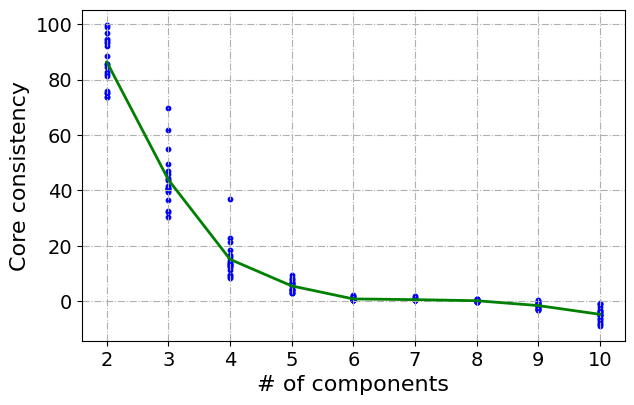

Number of K vs. Core consistency


In [8]:
components = hocmo.getCoreConsistency(tensor, "./data/core_consistency_rppa.png", iters = 100, num_k = 11, start =2, top_k=20)


In [9]:
components = 2
A,B,C = hocmo.factorize(tensor, components, method="ncp")

[A,B,C]: (295, 2) (6, 2) (4, 2)


In [10]:
component_preds_A, component_preds_B = hocmo.componentPredictionsForFactors(A,B)

295 inputs in total, each input belongs to a predicted component with the largest membership value:

 [1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1
 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1]
6 inputs in total, each input belongs to a predicted component with the largest membership value:

 [0 0 0 0 0 0]


/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:245: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(x_names.insert(0,''))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:246: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_labels)
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:253: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(y_names.insert(0,''))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:254: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x_labels)
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:260: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(z_names.insert(0,''))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:261: UserWarning: FixedFormatter should only be used together with FixedLocator


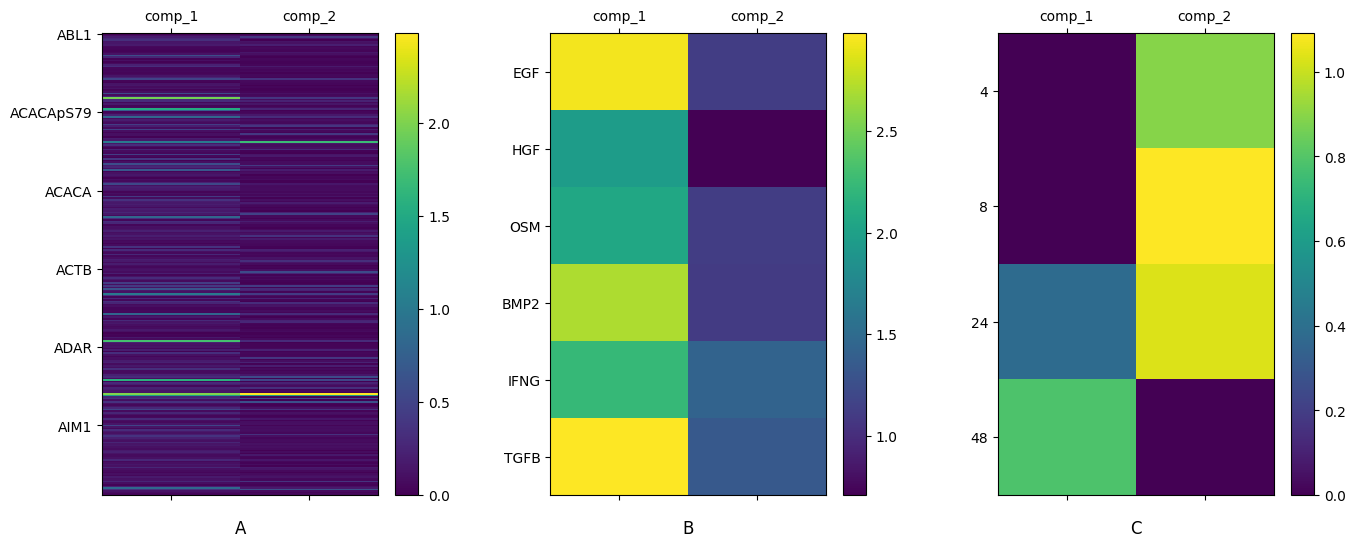

In [11]:
hocmo.plotFactorMatrices(A, B, C, components, './data/A_rppa.png', './data/B_rppa.png', './data/C_rppa.png', protein_names,ligand_names,condition_names)

['0~214', '215~294']
(6, 295, 4)


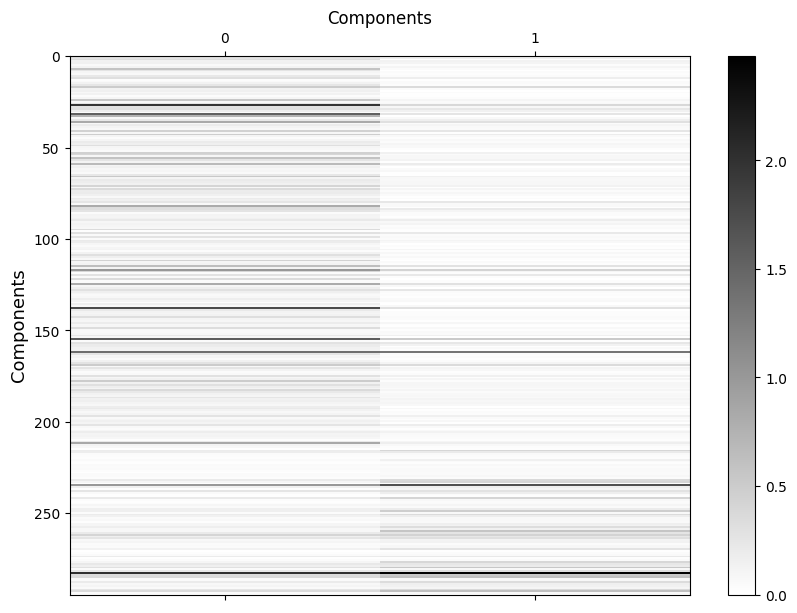

In [12]:
tensor_binary, A_ranked, A_names_ranked, A_clusters = hocmo.getClusterMembershipProbabilityA(A, 6,4, components, component_preds_A,  incidence_matrix_binary, incidence_matrix,
                                                        'Components', 'Proteins', "./data/A_ranked_per_cluster.png", )
##What makes "A" A? Why is A disease and not protein etc etc?
##What is supposed to be on the y axis?

['0~5', '6~5']


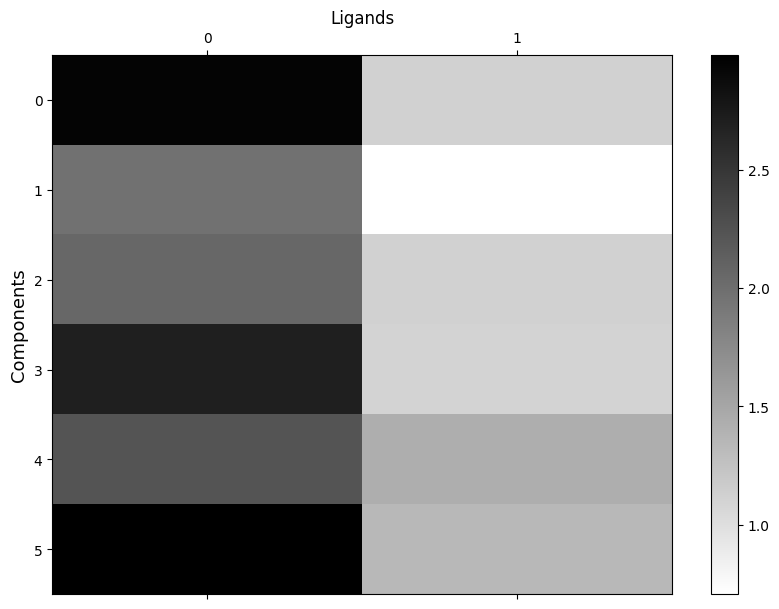

In [13]:
B_ranked, B_names_ranked, B_clusters = hocmo.getClusterMembershipProbability(B, components, component_preds_B, ligand_names, 'Components', 'Ligands', "./data/B_ranked_per_cluster.png")


/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:435: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(show_protein_names, fontsize=11)
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:440: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_labels, fontsize=12) ##number of components
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:450: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(B_names_ranked.insert(0,''))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:451: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x_labels, fontsize=12)
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:458: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(C_names.insert(0,''))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:459: UserWarn

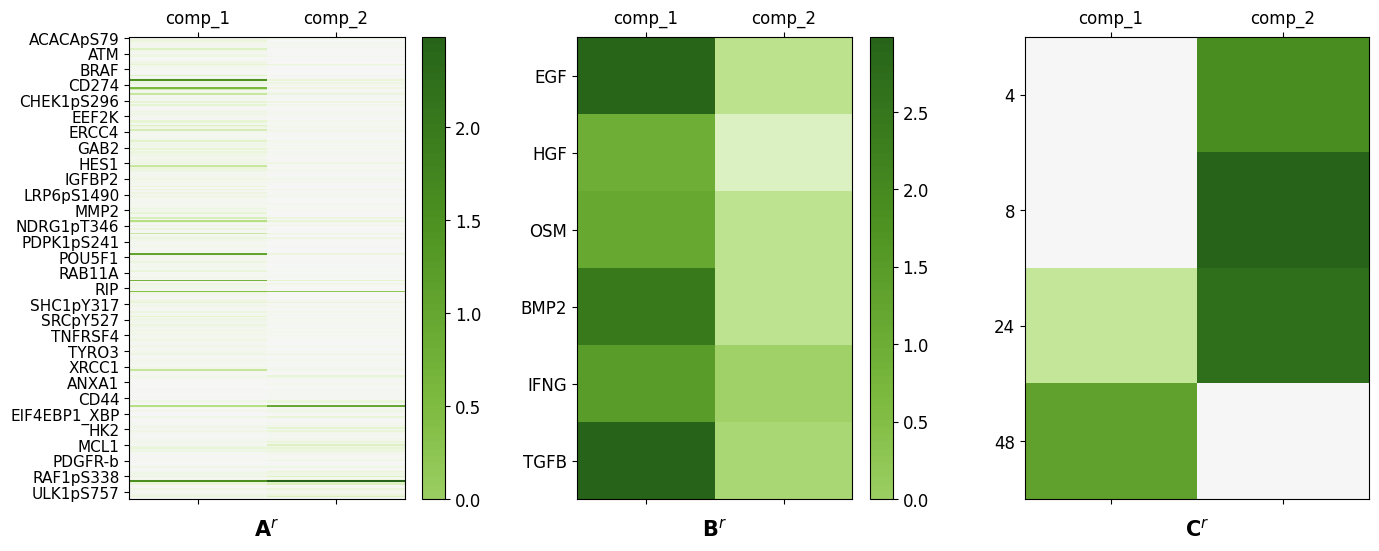

In [14]:
hocmo.plotLatentFactor(A_ranked, B_ranked, C, components, A_names_ranked, B_names_ranked, condition_names, './data/')

In [15]:
hocmo.saveFactorsToExcel(A_ranked, B_ranked, C, components, A_names_ranked, B_names_ranked, condition_names, './data/', "latentFactors.xlsx")

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:491: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer.save()


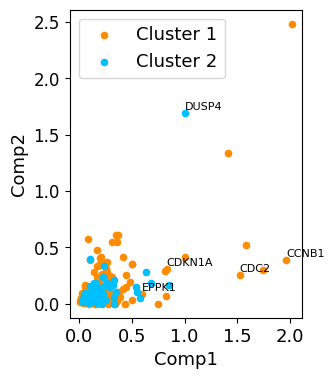

/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1014: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(show_y_names, fontsize=11)
/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1018: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_labels,fontsize=12)
/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1020: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(show_y_names_sig, fontsize=11)
/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1024: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_labels,fontsize=12)


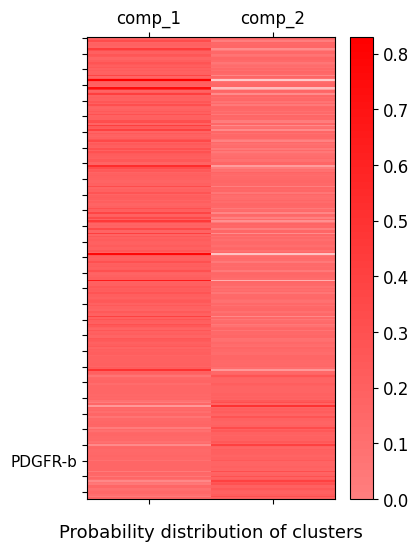

In [16]:
hocmo.plotForFactorMatrix(A_ranked, A_clusters, A_names_ranked, components,"proteins_per_cluster_scatter_plot.png", './data/' ,"proteins_per_cluster_probability.png")

In [17]:
condition_names

Index(['4', '8', '24', '48'], dtype='object')

(295, 6)


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1069: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(sparse_names, fontsize=11)
/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1074: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, fontsize=11, rotation =55)


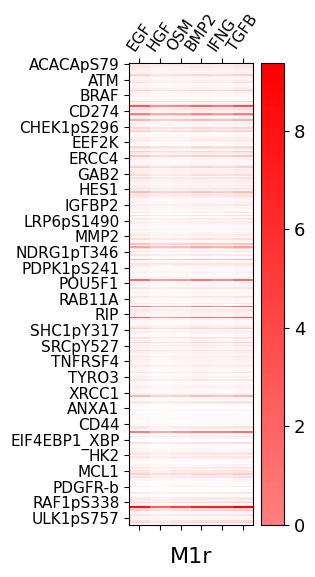

mean:0.6493460797209999, std:0.8664402456113491


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1101: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(flatten_patterns, fitted_pdf, color="green", **linestyle, fmt='-')


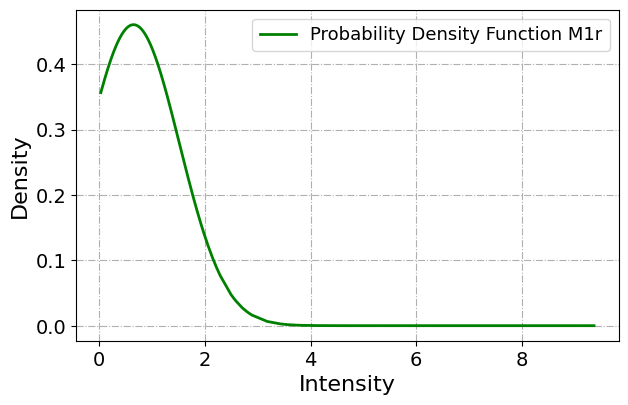

/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1131: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_intensity.save() # type: ignore


(295, 4)


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1069: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(sparse_names, fontsize=11)
/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1074: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, fontsize=11, rotation =55)


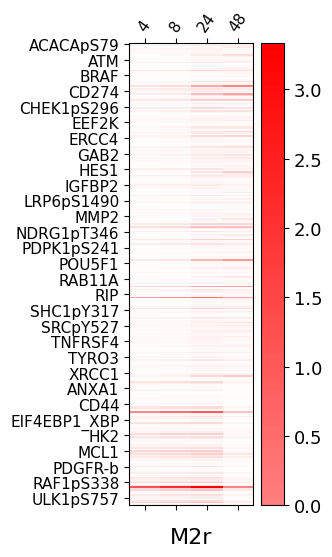

mean:0.15306789865247325, std:0.24023138061549684


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1101: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(flatten_patterns, fitted_pdf, color="green", **linestyle, fmt='-')


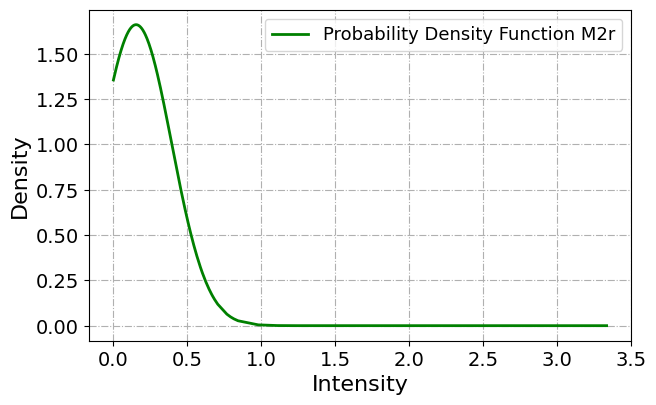

/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1131: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_intensity.save() # type: ignore


(6, 4)


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1069: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(sparse_names, fontsize=11)
/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1074: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, fontsize=11, rotation =55)


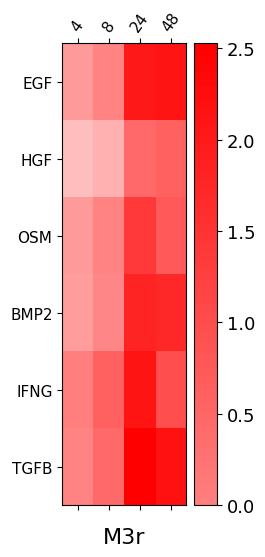

mean:1.5826027250990498, std:0.5440604884499752


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1101: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(flatten_patterns, fitted_pdf, color="green", **linestyle, fmt='-')


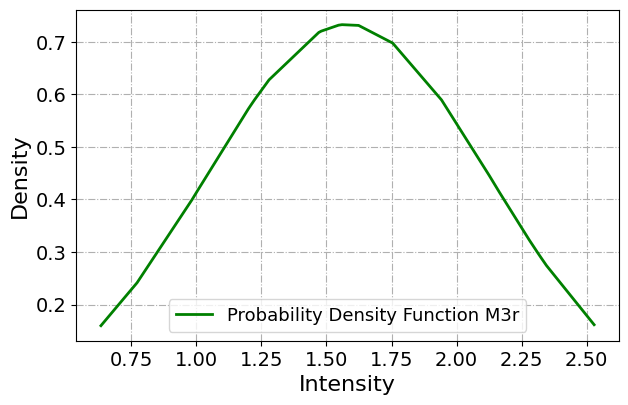

/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1131: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_intensity.save() # type: ignore


In [18]:
patterns_list, means_list, std_list = hocmo.getCorrelationsForAllFactors(A_ranked, B_ranked, C, A_names_ranked, B_names_ranked, condition_names,'./data/', "Intensity_density_ncp_rppa.xlsx", './data/', [ "M1r", "M2r", "M3r"],
                                        ['Probability Density Function M1r', 'Probability Density Function M2r','Probability Density Function M3r'])

In [19]:
patterns_AB = patterns_list[0]
patterns_AC = patterns_list[1]
patterns_BC = patterns_list[2]
mean_AB = means_list[0]
mean_AC = means_list[1]
mean_BC = means_list[2]
std_AB = std_list[0]
std_AC = std_list[1]
std_BC = std_list[2]

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:620: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(A_names_ranked.insert(0,''), size=(13))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:621: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(C_names,fontsize=12)


<Figure size 1600x1000 with 0 Axes>

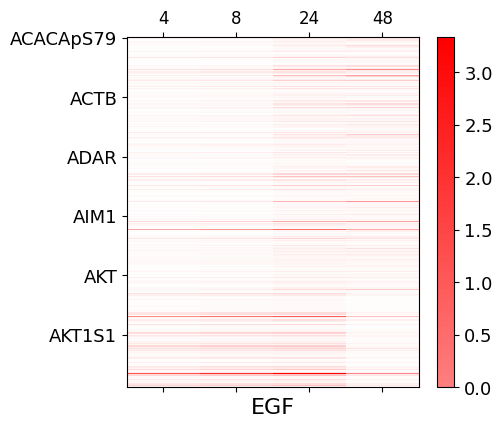

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:620: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(A_names_ranked.insert(0,''), size=(13))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:621: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(C_names,fontsize=12)


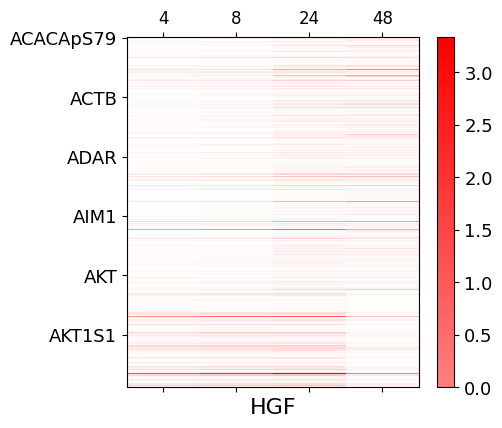

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:620: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(A_names_ranked.insert(0,''), size=(13))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:621: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(C_names,fontsize=12)


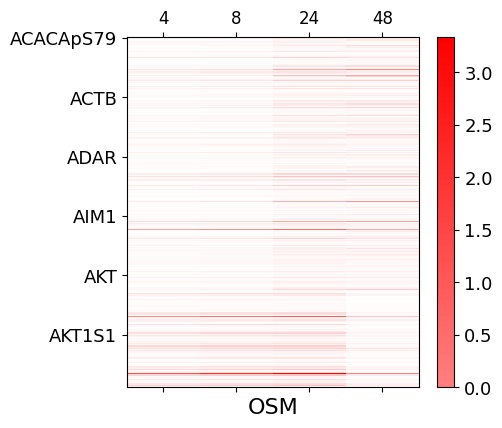

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:620: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(A_names_ranked.insert(0,''), size=(13))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:621: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(C_names,fontsize=12)


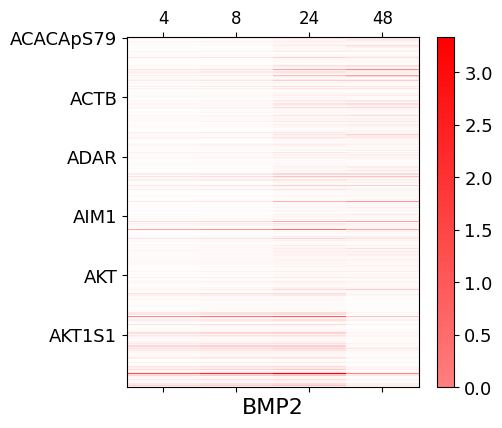

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:620: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(A_names_ranked.insert(0,''), size=(13))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:621: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(C_names,fontsize=12)


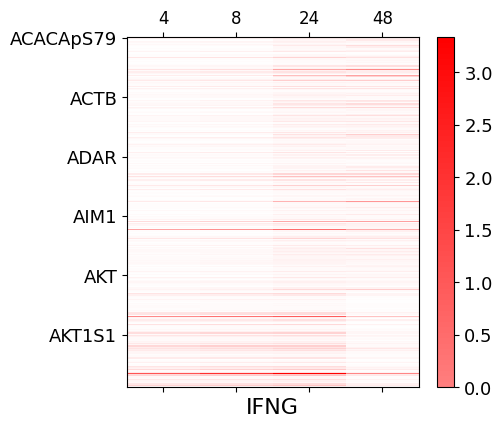

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:620: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(A_names_ranked.insert(0,''), size=(13))
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:621: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(C_names,fontsize=12)


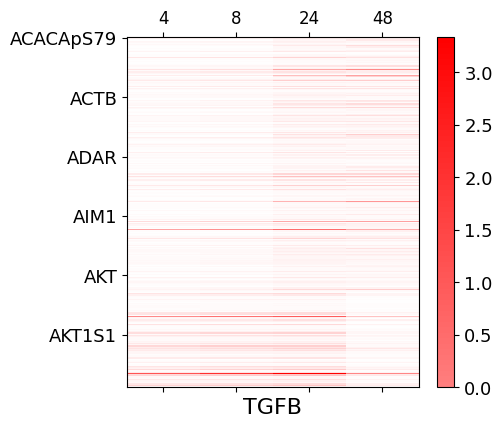

EGF, mean:0.15306789865247325, std:0.24023138061549684


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1131: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_intensity.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:639: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(flatten_AC, fitted_pdf, color="green", **linestyle, fmt='-')


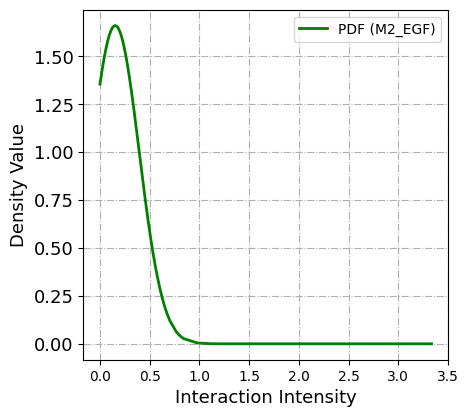

HGF, mean:0.15306789865247325, std:0.24023138061549684


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1131: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_intensity.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:639: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(flatten_AC, fitted_pdf, color="green", **linestyle, fmt='-')


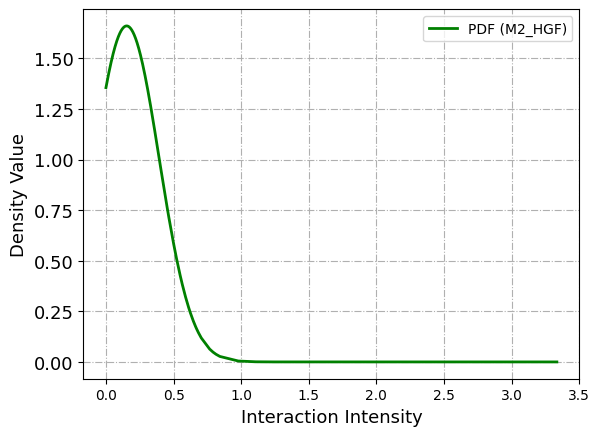

OSM, mean:0.15306789865247325, std:0.24023138061549684


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1131: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_intensity.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:639: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(flatten_AC, fitted_pdf, color="green", **linestyle, fmt='-')


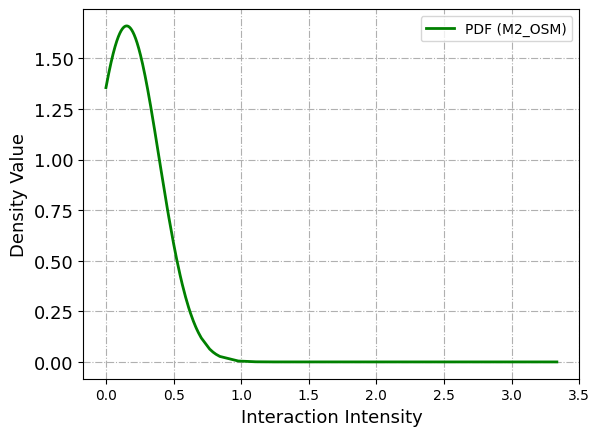

BMP2, mean:0.15306789865247325, std:0.24023138061549684


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1131: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_intensity.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:639: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(flatten_AC, fitted_pdf, color="green", **linestyle, fmt='-')


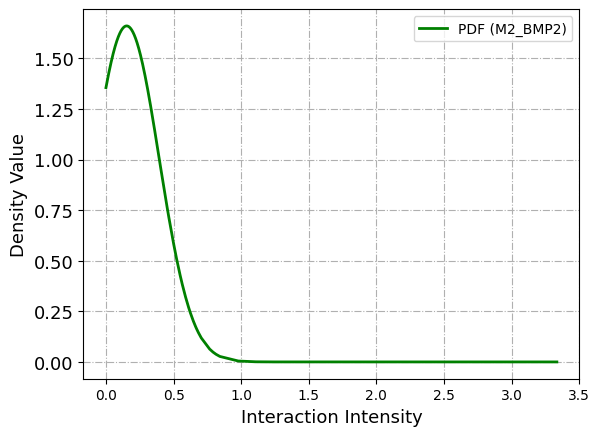

IFNG, mean:0.15306789865247325, std:0.24023138061549684


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1131: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_intensity.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:639: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(flatten_AC, fitted_pdf, color="green", **linestyle, fmt='-')


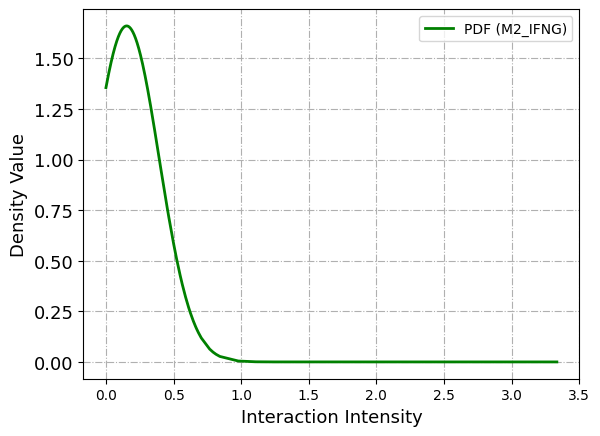

TGFB, mean:0.15306789865247325, std:0.24023138061549684


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1131: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_intensity.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:639: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(flatten_AC, fitted_pdf, color="green", **linestyle, fmt='-')


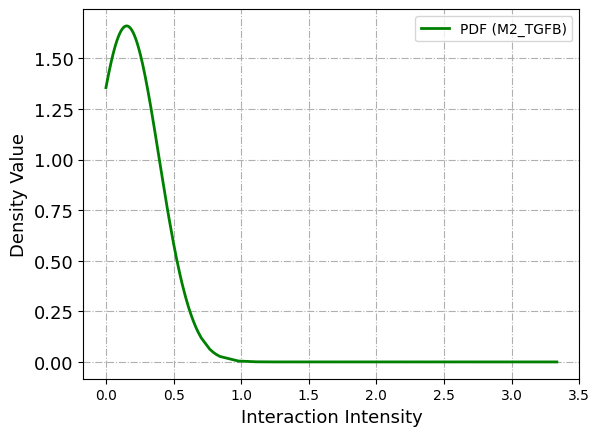

In [20]:
hocmo.plotCorrelationsPerEntity(patterns_AC, tensor_binary, A_names_ranked, B_names_ranked, condition_names, "./data/", "./data/")


In [21]:
patterns_AB_pairs, patterns_AC_pairs, patterns_BC_pairs = hocmo.writeCorrelationsToExcel(patterns_list, ["M1_AB", "M2_AC", "M3_BC"], './data/correlations.xlsx', A_names_ranked, B_names_ranked, condition_names)

/usr/local/lib/python3.8/dist-packages/HOCMO/hocmo.py:673: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer.save()


In [22]:
'''

'''

M1_cutoff_ce = 2.890480549 - mean_AB
M2_cutoff_ce = 0.70486722 - mean_AC
M3_cutoff_ce= 2.31192068 - mean_BC
cutoffs_center_elbow_list = [M1_cutoff_ce, M2_cutoff_ce, M3_cutoff_ce]
M1_cutoff_e = 2.890480549 - mean_AB
M2_cutoff_e = 0.70486722 - mean_BC
M3_cutoff_e= 2.31192068 - mean_BC
cutoffs_elbow_list = [M1_cutoff_e, M2_cutoff_e, M3_cutoff_e]
M1_cutoff_asymptotic = 4.137811156 - mean_AB
M2_cutoff_asymptotic = 1.110098385 - mean_AC
M3_cutoff_asymptotic=  2.342765763 - mean_BC
cutoffs_asymptotic_list = [M1_cutoff_asymptotic, M2_cutoff_asymptotic, M3_cutoff_asymptotic]
'''
M1_cutoff_ce = 0
M2_cutoff_ce = 0
M3_cutoff_ce= 0
cutoffs_center_elbow_list = [M1_cutoff_ce, M2_cutoff_ce, M3_cutoff_ce]
M1_cutoff_e = 0
M2_cutoff_e = 0
M3_cutoff_e= 0
cutoffs_elbow_list = [M1_cutoff_e, M2_cutoff_e, M3_cutoff_e]
M1_cutoff_asymptotic = 0
M2_cutoff_asymptotic = 0
M3_cutoff_asymptotic=  0
cutoffs_asymptotic_list = [M1_cutoff_asymptotic, M2_cutoff_asymptotic, M3_cutoff_asymptotic]
'''


##Reetika to proide info

'\nM1_cutoff_ce = 0\nM2_cutoff_ce = 0\nM3_cutoff_ce= 0\ncutoffs_center_elbow_list = [M1_cutoff_ce, M2_cutoff_ce, M3_cutoff_ce]\nM1_cutoff_e = 0\nM2_cutoff_e = 0\nM3_cutoff_e= 0\ncutoffs_elbow_list = [M1_cutoff_e, M2_cutoff_e, M3_cutoff_e]\nM1_cutoff_asymptotic = 0\nM2_cutoff_asymptotic = 0\nM3_cutoff_asymptotic=  0\ncutoffs_asymptotic_list = [M1_cutoff_asymptotic, M2_cutoff_asymptotic, M3_cutoff_asymptotic]\n'

In [23]:
hocmo.getSignificantEntities([patterns_AB_pairs, patterns_AC_pairs, patterns_BC_pairs], cutoffs_elbow_list, cutoffs_center_elbow_list, cutoffs_asymptotic_list, [mean_AB, mean_AC, mean_BC], ["M1_Elbow", "M2_Elbow", "M3_Elbow"], ["M1_Center_Elbow", "M2_Center_Elbow", "M3_Center_Elbow"], ["M1_Asymptotic", "M2_Asymptotic", "M3_Asymptotic"], './data/SignificantEntities.xlsx')


/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1150: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_mean.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1150: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_mean.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1150: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_mean.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1150: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer_mean.save() # type: ignore
/usr/local/lib/python3.8/dist-packages/HOCMO/utils.py:1150: FutureWarning: save is not part of the publi

In [24]:
summary_df = hocmo.getHOCscores(patterns_AC, patterns_AB, A_names_ranked, B_names_ranked, condition_names, './data/')


Inside Hoc scores function
Iteration  0
EGF.csv
File written...
Iteration  1
HGF.csv
File written...
Iteration  2
OSM.csv
File written...
Iteration  3
BMP2.csv
File written...
Iteration  4
IFNG.csv
File written...
Iteration  5
TGFB.csv
File written...
created summary file


In [25]:
summary_df

,B_entities,min,1Q,median,3Q,max
0,EGF,0.0,0.000423,0.001189,0.004735,1.0
1,HGF,0.0,0.000423,0.001199,0.004791,1.0
2,OSM,0.0,0.000408,0.001116,0.004457,1.0
3,BMP2,0.0,0.000421,0.001185,0.004681,1.0
4,IFNG,0.0,0.000395,0.001077,0.004302,1.0
5,TGFB,0.0,0.000419,0.001167,0.004630,1.0


In [26]:
def hoc_dict(file, threshold, filePath, ipFilePath):
    hoc_score_dict = {}
    gene_file = pd.read_csv(os.path.join(ipFilePath, file))
    gene_file = gene_file.set_index("Unnamed: 0")
    gene = str(file).split(".")[0]
    print("Gene:", gene)
    row_names = list(gene_file.index)
    columns = list(gene_file.columns)
    for row in row_names:
        for col in columns:
            if gene_file.loc[row][col] > threshold:
                k = str("<"+gene+","+str(row) + "," + str(col)+">")
                hoc_score_dict[k] = gene_file.loc[row][col]
    hoc_score_df = pd.DataFrame(hoc_score_dict.values(), index = list(hoc_score_dict.keys()), columns=['hoc_score'])
    hoc_score_df = hoc_score_df.sort_values(by=['hoc_score'], ascending=False)
    hoc_score_df.to_csv(os.path.join(filePath, str("hoc_triplets"+ gene + ".csv" )))
    sys.stdout.flush()